In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ai_trainer import Personal_Trainer
import squat_separation as ss
import sys
import pickle

sys.path.append('data')

%matplotlib inline

#Step 1: Instantiate our personal trainer and load preprocessed data

In [2]:
pt = Personal_Trainer('NeckY')
pt.load_squats('dataV1.p')

#Step 2: Extract features 

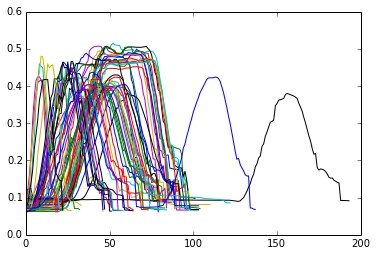

In [3]:
for squat in pt.get_squats():
    plt.plot(squat[0]['NeckY'])

In [4]:
X, y = pt.extract_features()

In [5]:
print X.shape, y.shape

(64, 200) (64,)


#Step 3: Classification

##Scale features and define testing function

In [6]:
from sklearn import preprocessing
from sklearn import cross_validation
from sklearn import metrics

X = preprocessing.StandardScaler().fit_transform(X)

def predict_labels(X, y, X_test, clf_class, **kwargs):
    clf = clf_class(**kwargs)
    clf.fit(X ,y)
    return clf.predict(X_test)

def stratified_cv(X, y, clf_class, shuffle=True, n_folds=10, **kwargs):
    stratified_k_fold = cross_validation.StratifiedKFold(y, n_folds=n_folds, shuffle=shuffle)
    y_pred = y.copy()
    for i, j in stratified_k_fold:
        X_train, X_test = X[i], X[j]
        y_train = y[i]
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[j] = clf.predict(X_test)
    return y_pred


##Test Various Classifiers

In [7]:
from sklearn import ensemble
from sklearn import svm
from sklearn import neighbors
from sklearn import linear_model

print('Logistic Regression:           {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, linear_model.LogisticRegression))))
print('Support vector machine(SVM):   {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, svm.SVC))))
print('Random Forest Classifier:      {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, ensemble.RandomForestClassifier))))

Logistic Regression:           0.97
Support vector machine(SVM):   1.00
Random Forest Classifier:      0.97


##Classify a squat from an individual that has no squats in the training data

In [8]:
#=====[ This data was left out of dataSansMarilyn.p ]====
import coords9 as cd9

#=====[ Load in squats and get our training X/y ]=====
# pt.load_squats('dataSansMarilyn.p')
X, y = pt.extract_features()

#=====[ Preprocess test set ]=====
test_squats = pt.analyze_squats(cd9.data[100:],cd9.label)
X_test,y_test = pt.extract_features(test_squats)

X_test = preprocessing.StandardScaler().fit_transform(X_test)

In [9]:
print('Logistic Regression:      {:.2f}'.format(metrics.accuracy_score(y_test, predict_labels(X, y, X_test, linear_model.LogisticRegression))))
print('Support vector machine(SVM):     {:.2f}'.format(metrics.accuracy_score(y_test, predict_labels(X, y, X_test, svm.SVC))))
print('Random Forest Classifier      {:.2f}'.format(metrics.accuracy_score(y_test, predict_labels(X, y, X_test, ensemble.RandomForestClassifier))))

Logistic Regression:      0.67
Support vector machine(SVM):     1.00
Random Forest Classifier      1.00


In [10]:
X_test.shape

(3, 200)